In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
ls -lh ../data/sample_data/

total 8
drwxr-xr-x@ 6 iritani  staff   192B Mar 24 21:47 BBwave.dir.S4.00/
-rw-r--r--  1 iritani  staff    98B Mar 24 21:48 README.md
drwxr-xr-x@ 6 iritani  staff   192B Mar 24 21:47 correlator.PS.dir/


In [5]:
# import library 
from hal_pot_single_ch import HAL_pot
from corr_baryon import Corr_2pt_Baryon

lattice spacing

In [6]:
ainv = 2.194e3 # MeV
hbarc = 0.197e3 # MeV fm
lat_unit = hbarc/ainv

baryon correlator 解析

In [7]:
cb = Corr_2pt_Baryon('Xi_CG05_CG05', bin_size=1, result_dir='../data/sample_data/')

# Read Xi_CG05_CG05
# total 4 conf., bin size = 1, number of samples =  4


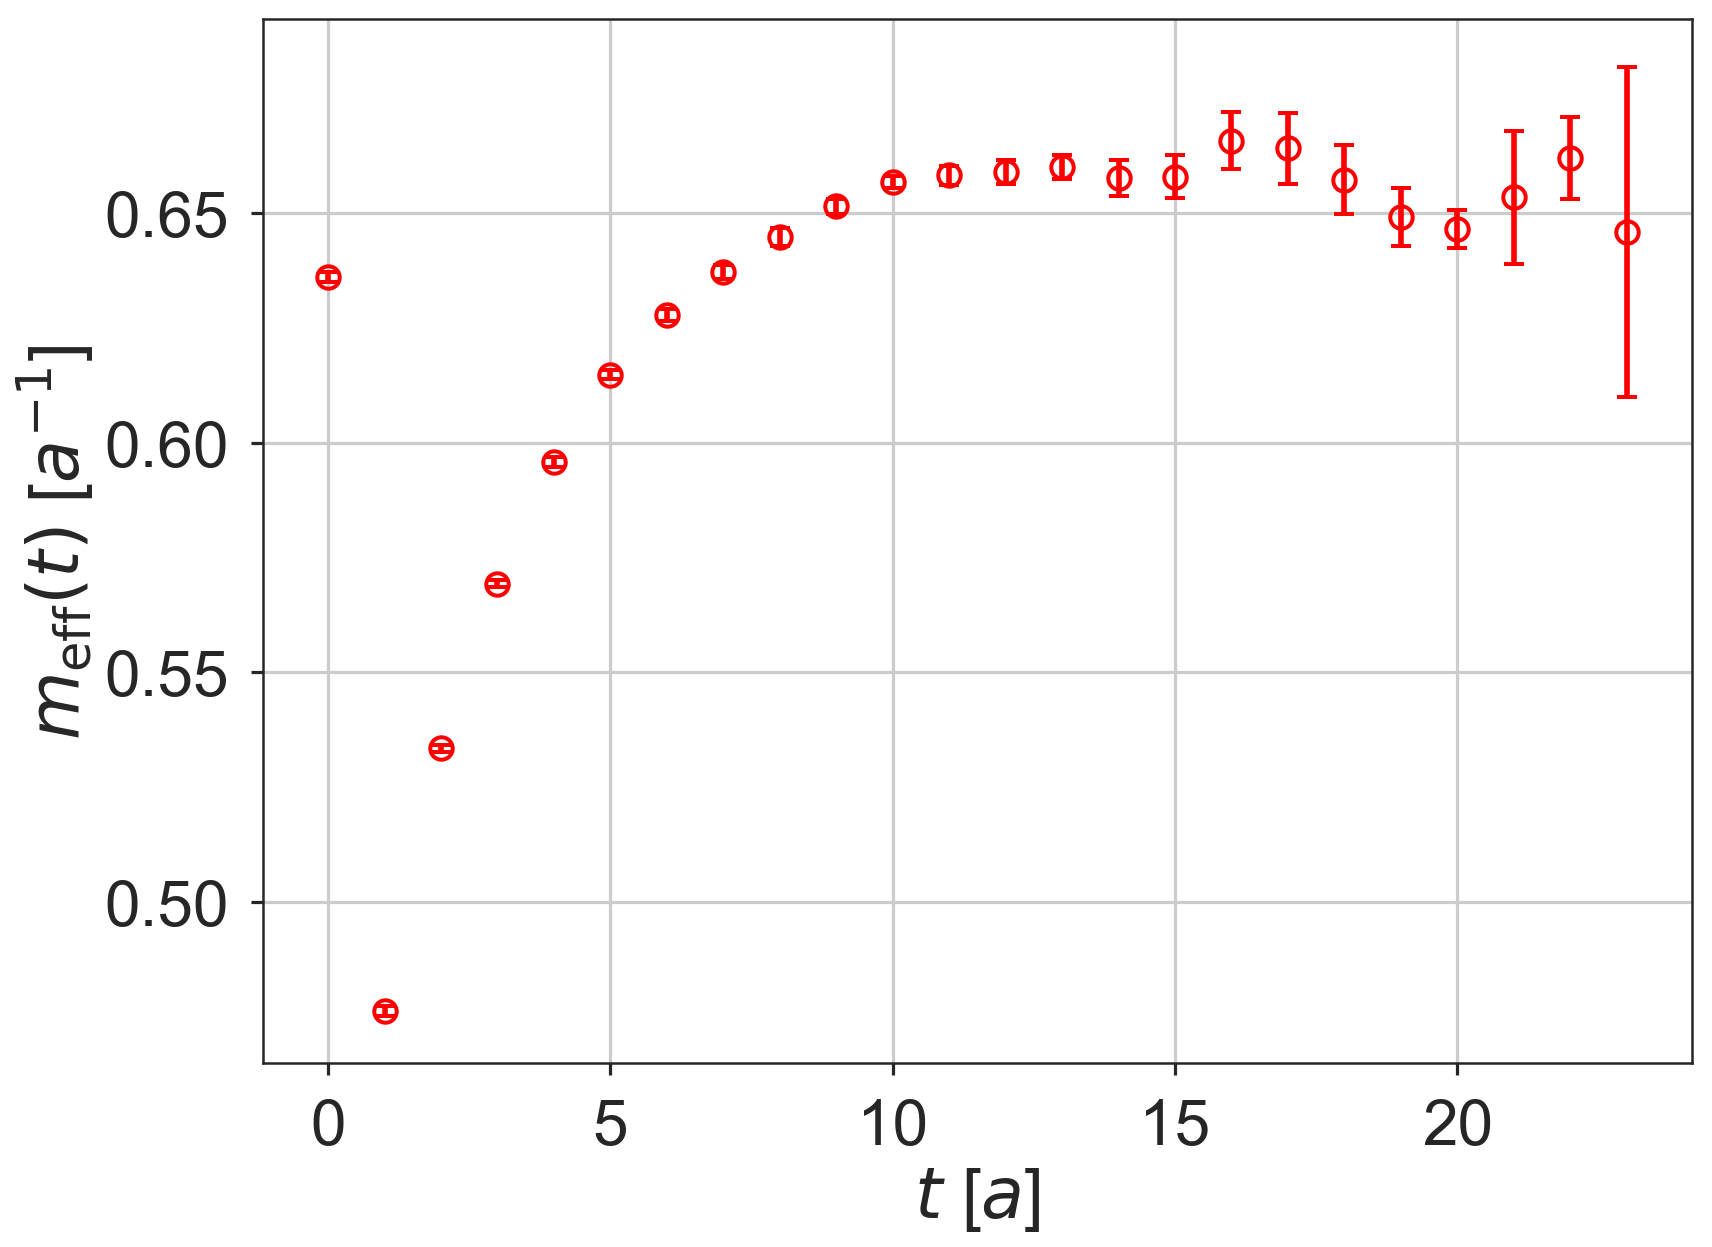

In [8]:
cb.plot_meff()

Text(0.5,1,'$\\Xi$-baryon effective mass')

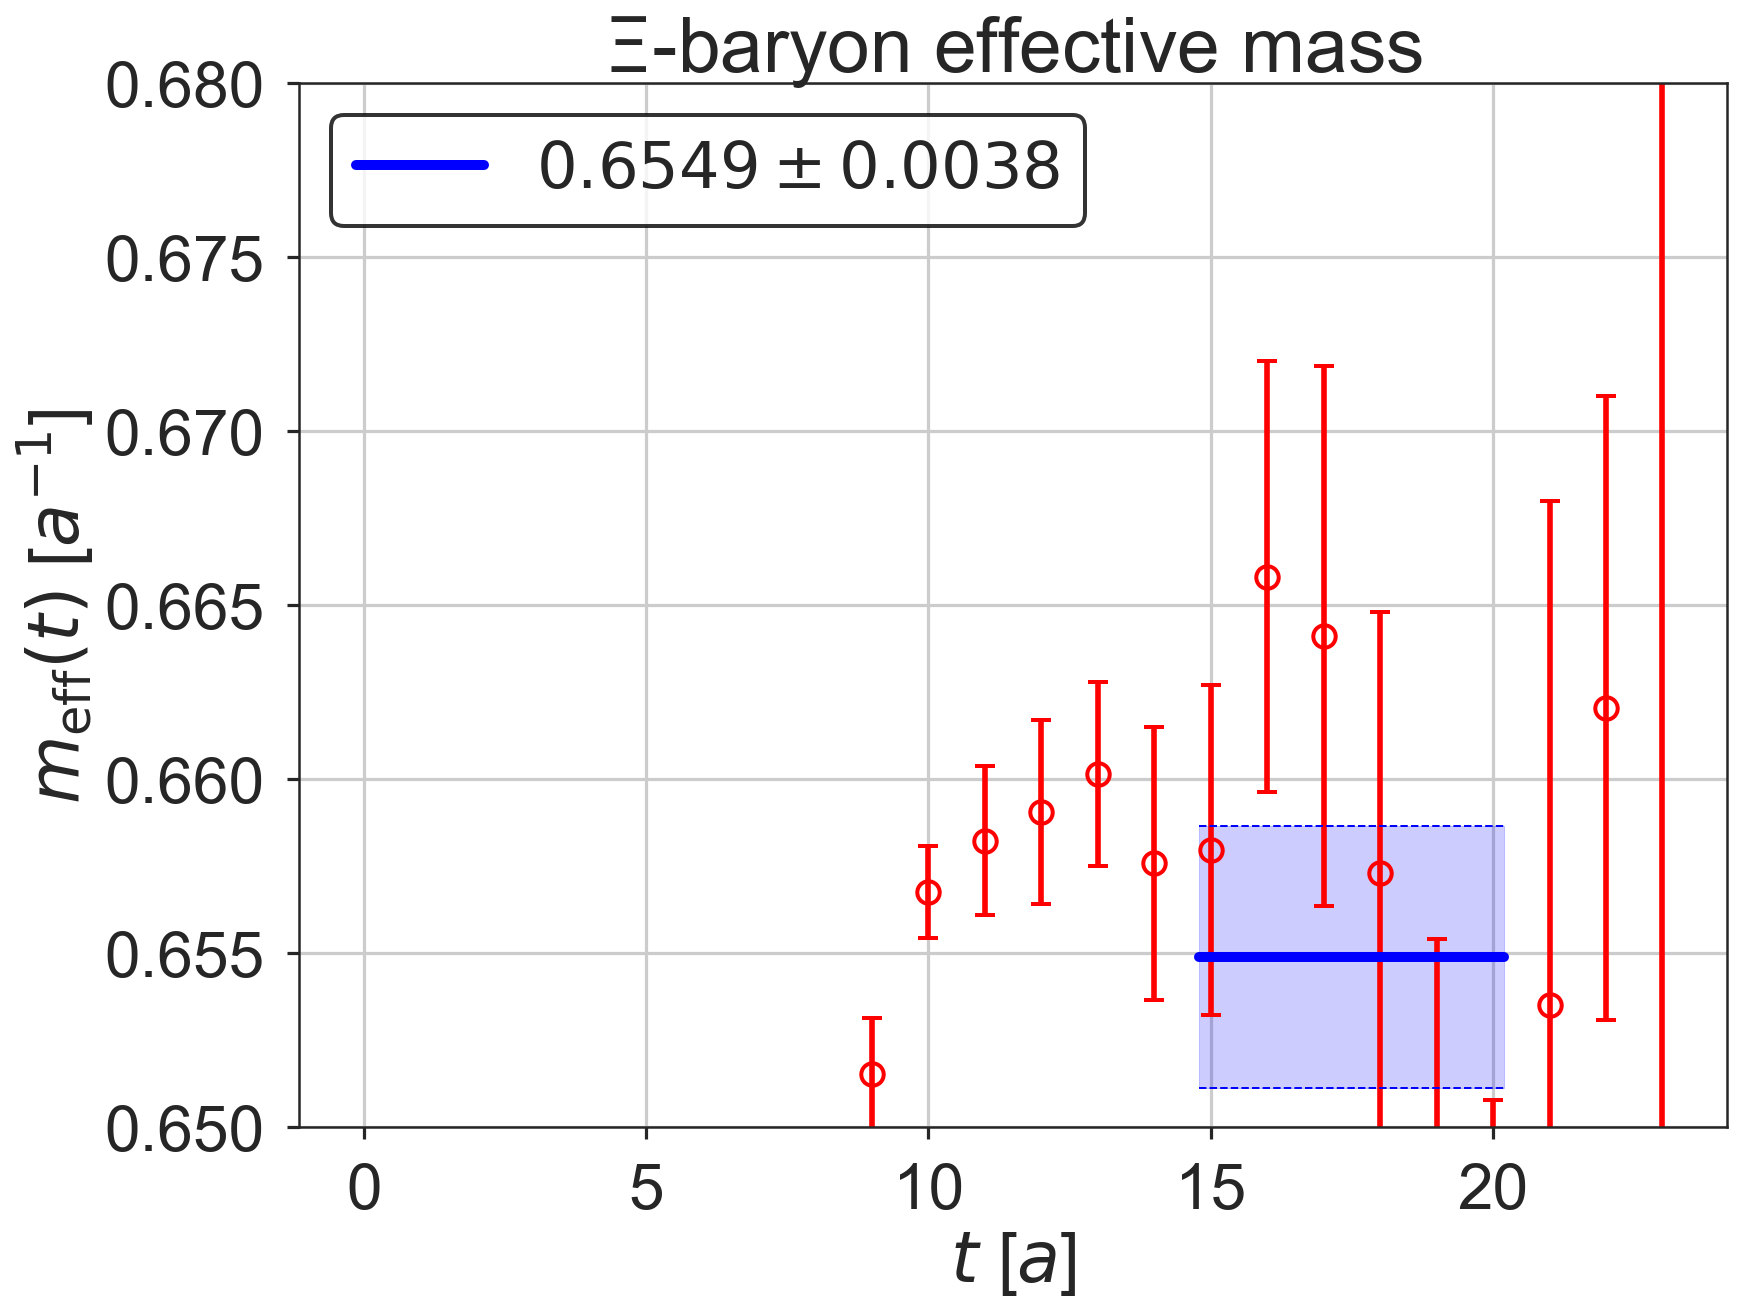

In [9]:
fig, ax = plt.subplots()
cb.fit_meff(fit_min=15, fit_max=20, ax=ax)
ax.set_ylim(0.65, 0.68)
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.set_title('$\Xi$-baryon effective mass')

In [10]:
m_red = 0.5 * 0.665 

In [18]:
hal = HAL_pot(m_red=m_red, result_dir='../data/sample_data/',
              it0 = 10, Ns=48, channel='xixi', bin_size=2)

# Read Xi_CG05_CG05
# total 4 conf., bin size = 2, number of samples =  2


In [19]:
# potential
result = hal.calc_pot(pot_type='cen', spin='1s0')

# calc. Rcorr  results.rcorr.binned/Rcorr_1s0_xixi_t009_2bin_4conf.dat
# binning and decompress NBS
# binning NBS S4.00 t = 9
--- binning NBS wavefunc. --- 000
>> decompress results.nbs.binned/NBSwave.S4.00.t009.binned.000.dat
--- binning NBS wavefunc. --- 001
>> decompress results.nbs.binned/NBSwave.S4.00.t009.binned.001.dat
>> total 2 binned NBS files
# load  results.nbs.decomp/NBSwave.S4.00.t009.binned.000.decomp.dat
# load  results.nbs.decomp/NBSwave.S4.00.t009.binned.001.decomp.dat
# save results.rcorr.binned/Rcorr_1s0_xixi_t009_2bin_4conf.dat
# calc. Rcorr  results.rcorr.binned/Rcorr_1s0_xixi_t010_2bin_4conf.dat
# binning and decompress NBS
# binning NBS S4.00 t = 10
--- binning NBS wavefunc. --- 000
>> decompress results.nbs.binned/NBSwave.S4.00.t010.binned.000.dat
--- binning NBS wavefunc. --- 001
>> decompress results.nbs.binned/NBSwave.S4.00.t010.binned.001.dat
>> total 2 binned NBS files
# load  results.nbs.decomp/NBSwave.S4.00.t010.binned.000.decomp.dat
# load  results.nbs.

In [20]:
ls

HAL+potential+code.ipynb  corr_baryon.py            results.nbs.decomp/
PH1.compress48*           hal_pot_single_ch.py      results.pot/
__pycache__/              results.nbs.binned/       results.rcorr.binned/


In [21]:
pot = np.loadtxt('results.pot/pot_1s0_cen_xixi_t010_004conf_002bin.dat')

In [22]:
pot.shape

(2925, 9)

columns of potential data

0, 1, 2, 3, 4, 5, 6, 7, 8

r, H0-term (av, err) , d/dt-term (av, err), d2/dt2-term (av, err), total (av, err)

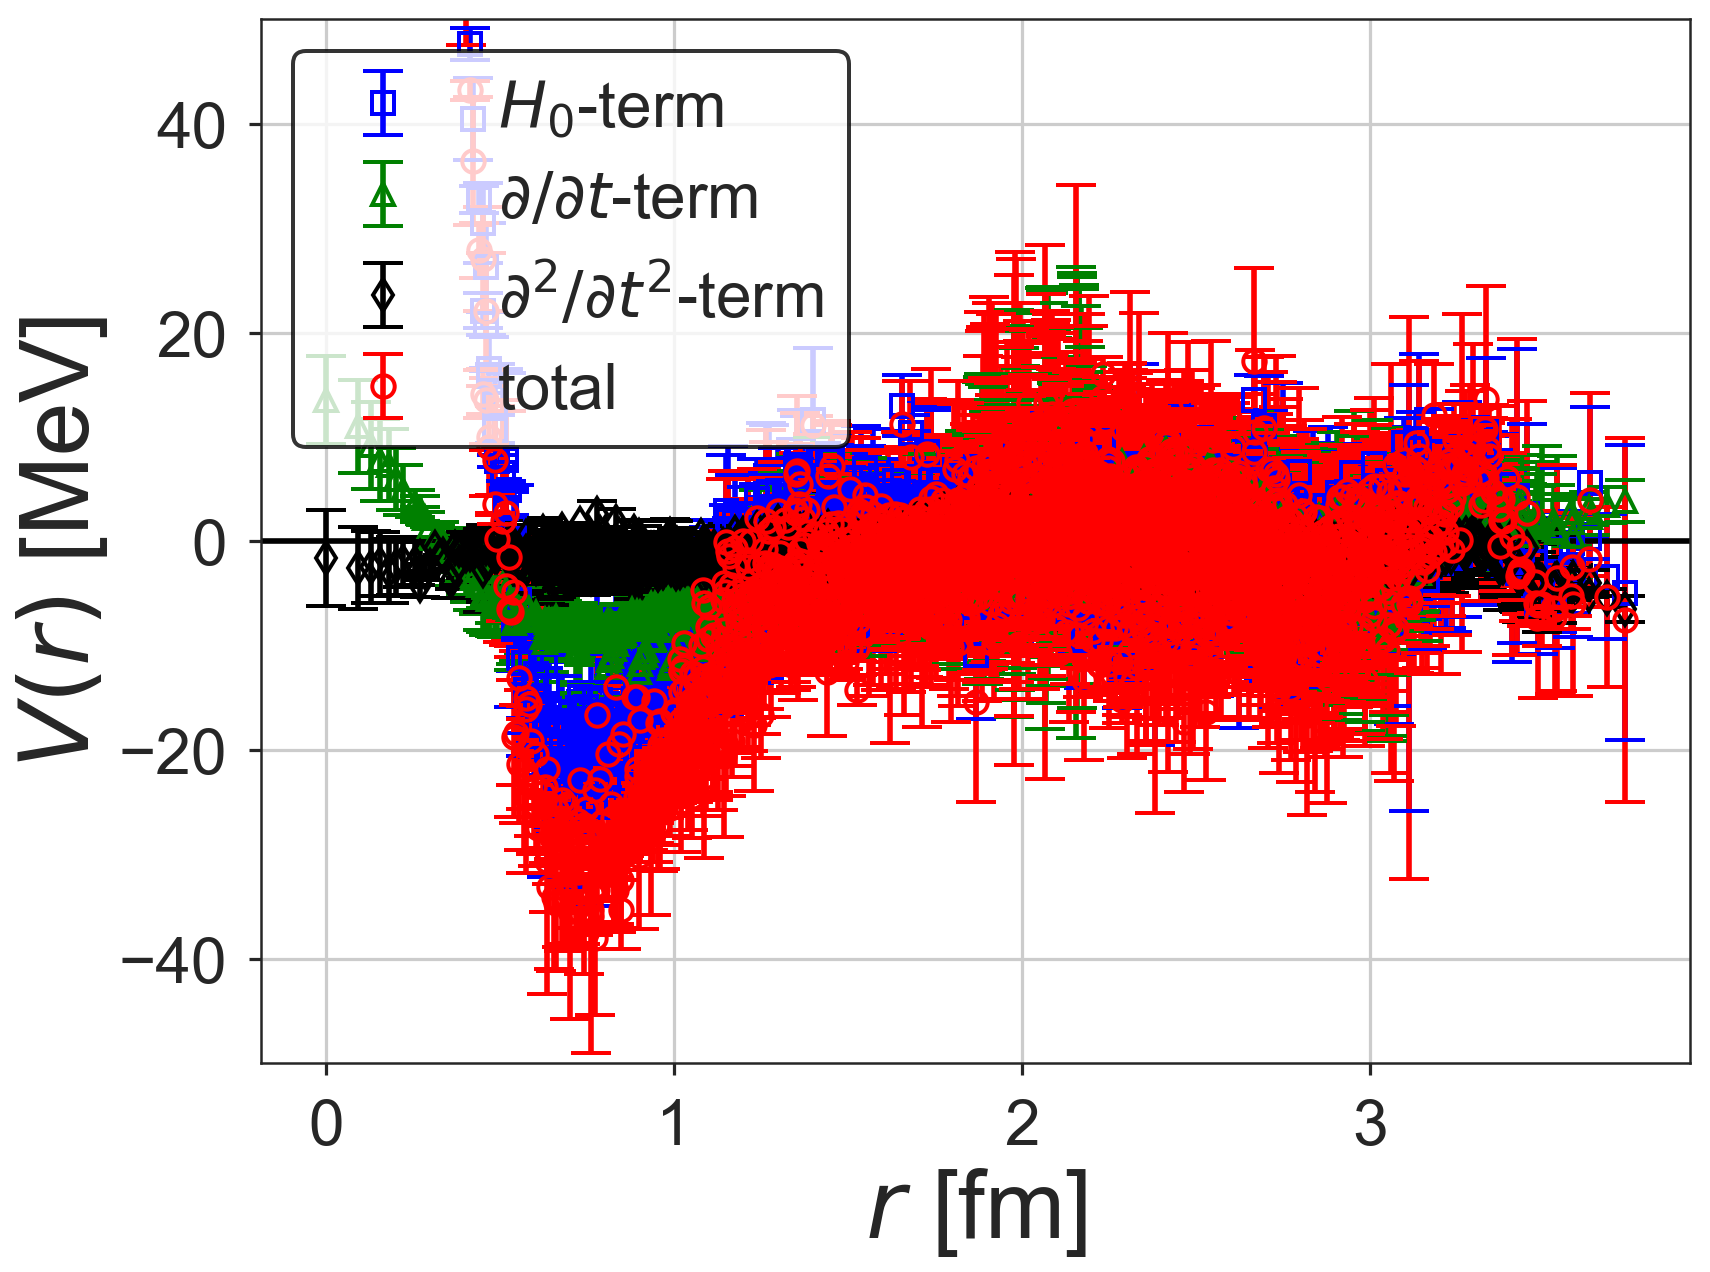

In [23]:
fig, ax = plt.subplots()
ax.errorbar(pot[:,0]*lat_unit, pot[:,1]*ainv, pot[:,2]*ainv,
            fmt='bs', mfc='none', mew=2, capsize=10, capthick=2, label=r'$H_0$-term')

ax.errorbar(pot[:,0]*lat_unit, pot[:,3]*ainv, pot[:,4]*ainv,
           fmt='g^', mfc='none', mew=2, capsize=10, capthick=2, label=r'$\partial/\partial t$-term')

ax.errorbar(pot[:,0]*lat_unit, pot[:,5]*ainv, pot[:,6]*ainv,
           fmt='kd', mfc='none', mew=2, capsize=10, capthick=2, label=r'$\partial^2/\partial t^2$-term')

ax.errorbar(pot[:,0]*lat_unit, pot[:,7]*ainv, pot[:,8]*ainv,
           fmt='ro', mfc='none', mew=2, capsize=10, capthick=2, label='total')

ax.set_ylim(-50, 50)

ax.axhline(0, color='black')
ax.set_xlabel(r'$r$ [fm]', size=48)
ax.set_ylabel(r'$V(r)$ [MeV]', size=48)
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)